In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
import tensorflow as tf

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"E:\ALUuu\traning",  # Use raw string to avoid escape character issues
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())


(32, 256, 256, 3)
[0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 2 1 1 1 0 0 2 0 0 2 1]


# Image Visual

(32, 256, 256, 3)
[1 0 0 1 1 0 2 1 2 0 1 1 0 0 1 1 0 1 2 0 0 1 0 1 0 1 0 1 1 0 1 0]


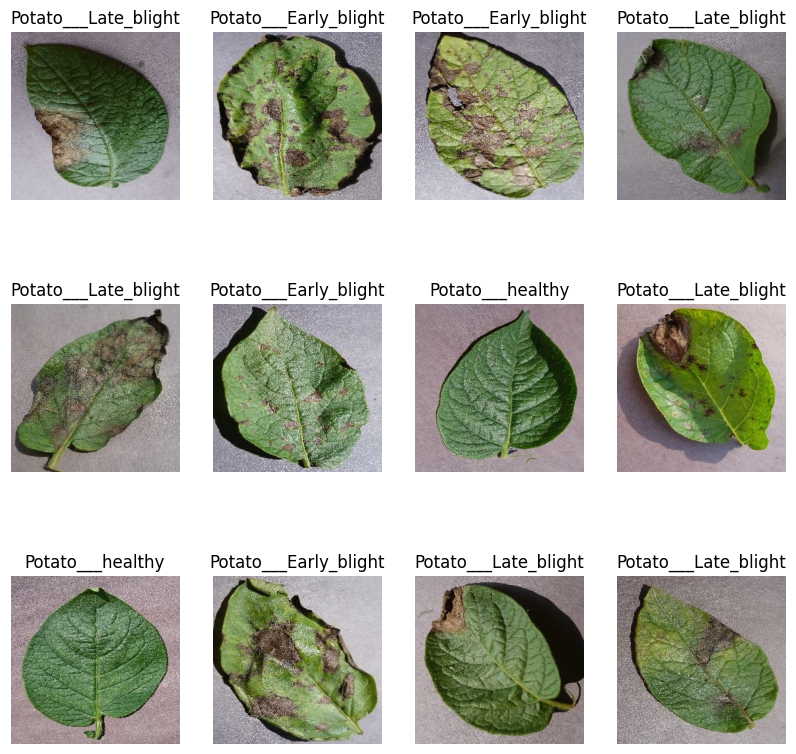

In [ ]:
import matplotlib.pyplot as plt

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    plt.figure(figsize=(10, 10))
    for i in range(min(12, len(image_batch))): 
        plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_names[labels_batch[i]]) 
        plt.axis("off")
        

In [ ]:
# 80% ==> Training
# 10% ==> Validation
# 10% ==> Test

In [ ]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
test_ds=dataset.take(54)
len(test_ds)

54

In [ ]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [ ]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)
len(val_ds)
len(test_ds)

8

In [ ]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for x, y in train_ds.take(1):
    print("Train shape:", x.shape, y.shape)

for x, y in val_ds.take(1):
    print("Val shape:", x.shape, y.shape)

for x, y in test_ds.take(1):
    print("Test shape:", x.shape, y.shape)


Train shape: (32, 256, 256, 3) (32,)
Val shape: (32, 256, 256, 3) (32,)
Test shape: (32, 256, 256, 3) (32,)


In [ ]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.34901962 0.31764707 0.3764706 ]
  [0.34509805 0.3137255  0.37254903]
  [0.31764707 0.28627452 0.34509805]
  ...
  [0.6039216  0.5882353  0.6431373 ]
  [0.60784316 0.5921569  0.64705884]
  [0.6117647  0.59607846 0.6509804 ]]

 [[0.4        0.36862746 0.42745098]
  [0.39607844 0.3647059  0.42352942]
  [0.34509805 0.3137255  0.37254903]
  ...
  [0.5921569  0.5764706  0.6313726 ]
  [0.59607846 0.5803922  0.63529414]
  [0.59607846 0.5803922  0.63529414]]

 [[0.35686275 0.3254902  0.38431373]
  [0.36078432 0.32941177 0.3882353 ]
  [0.30980393 0.2784314  0.3372549 ]
  ...
  [0.6039216  0.5882353  0.6431373 ]
  [0.6039216  0.5882353  0.6431373 ]
  [0.6039216  0.5882353  0.6431373 ]]

 ...

 [[0.39215687 0.36862746 0.42352942]
  [0.42745098 0.40392157 0.45882353]
  [0.47058824 0.44705883 0.5019608 ]
  ...
  [0.63529414 0.61960787 0.6745098 ]
  [0.63529414 0.61960787 0.6745098 ]
  [0.62352943 0.60784316 0.6627451 ]]

 [[0.2627451  0.23921569 0.29411766]
  [0.4509804  0.42745098 0.48235294]


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [ ]:
BATCH_SIZE

32

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# USE CNN 


In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\prith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50


OverflowError: Python int too large to convert to C long

In [ ]:
len(test_ds)

8

In [ ]:
score = model.evaluate(test_ds)

8/8 [==============================] - 1s 151ms/step - loss: 0.0203 - accuracy: 0.9961


In [ ]:
score

[0.9267255067825317, 0.671875]

In [ ]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5] 

[0.900833249092102,
 0.651845395565033,
 0.4514481723308563,
 0.35760021209716797,
 0.2331569343805313]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

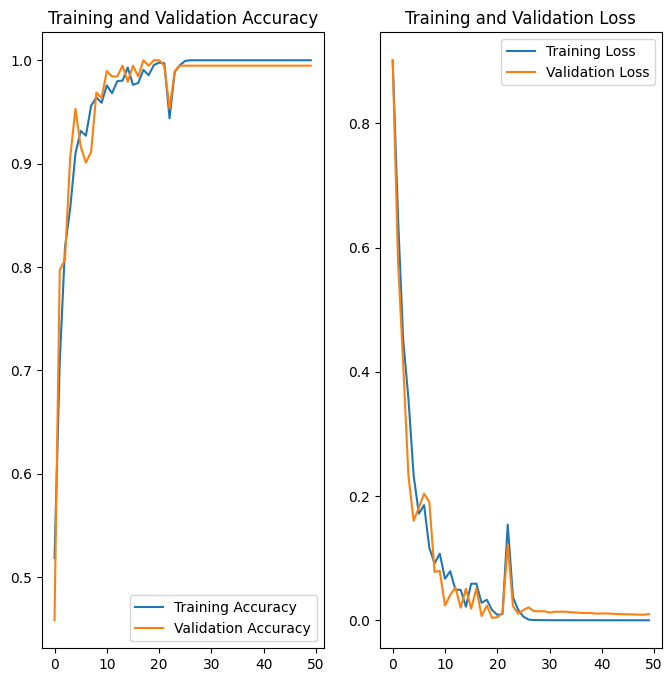

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 183ms/step
predicted label: Potato___Late_blight


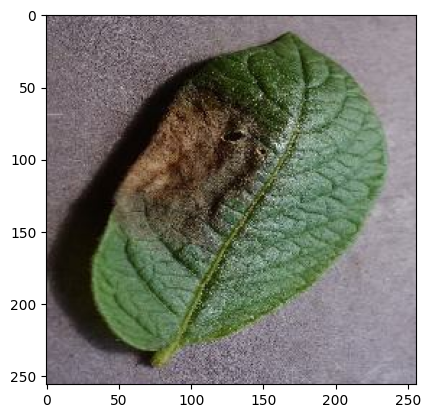

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())  # Use 'img' not 'images[i]'
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    predictions = model.predict(img_array)
    predicted_index = tf.argmax(predictions[0]).numpy()
    predicted_class = class_names[predicted_index]
    confidence = 100 * tf.reduce_max(predictions[0]).numpy()

    return predicted_class, confidence


1/1 [==============================] - 0s 17ms/step


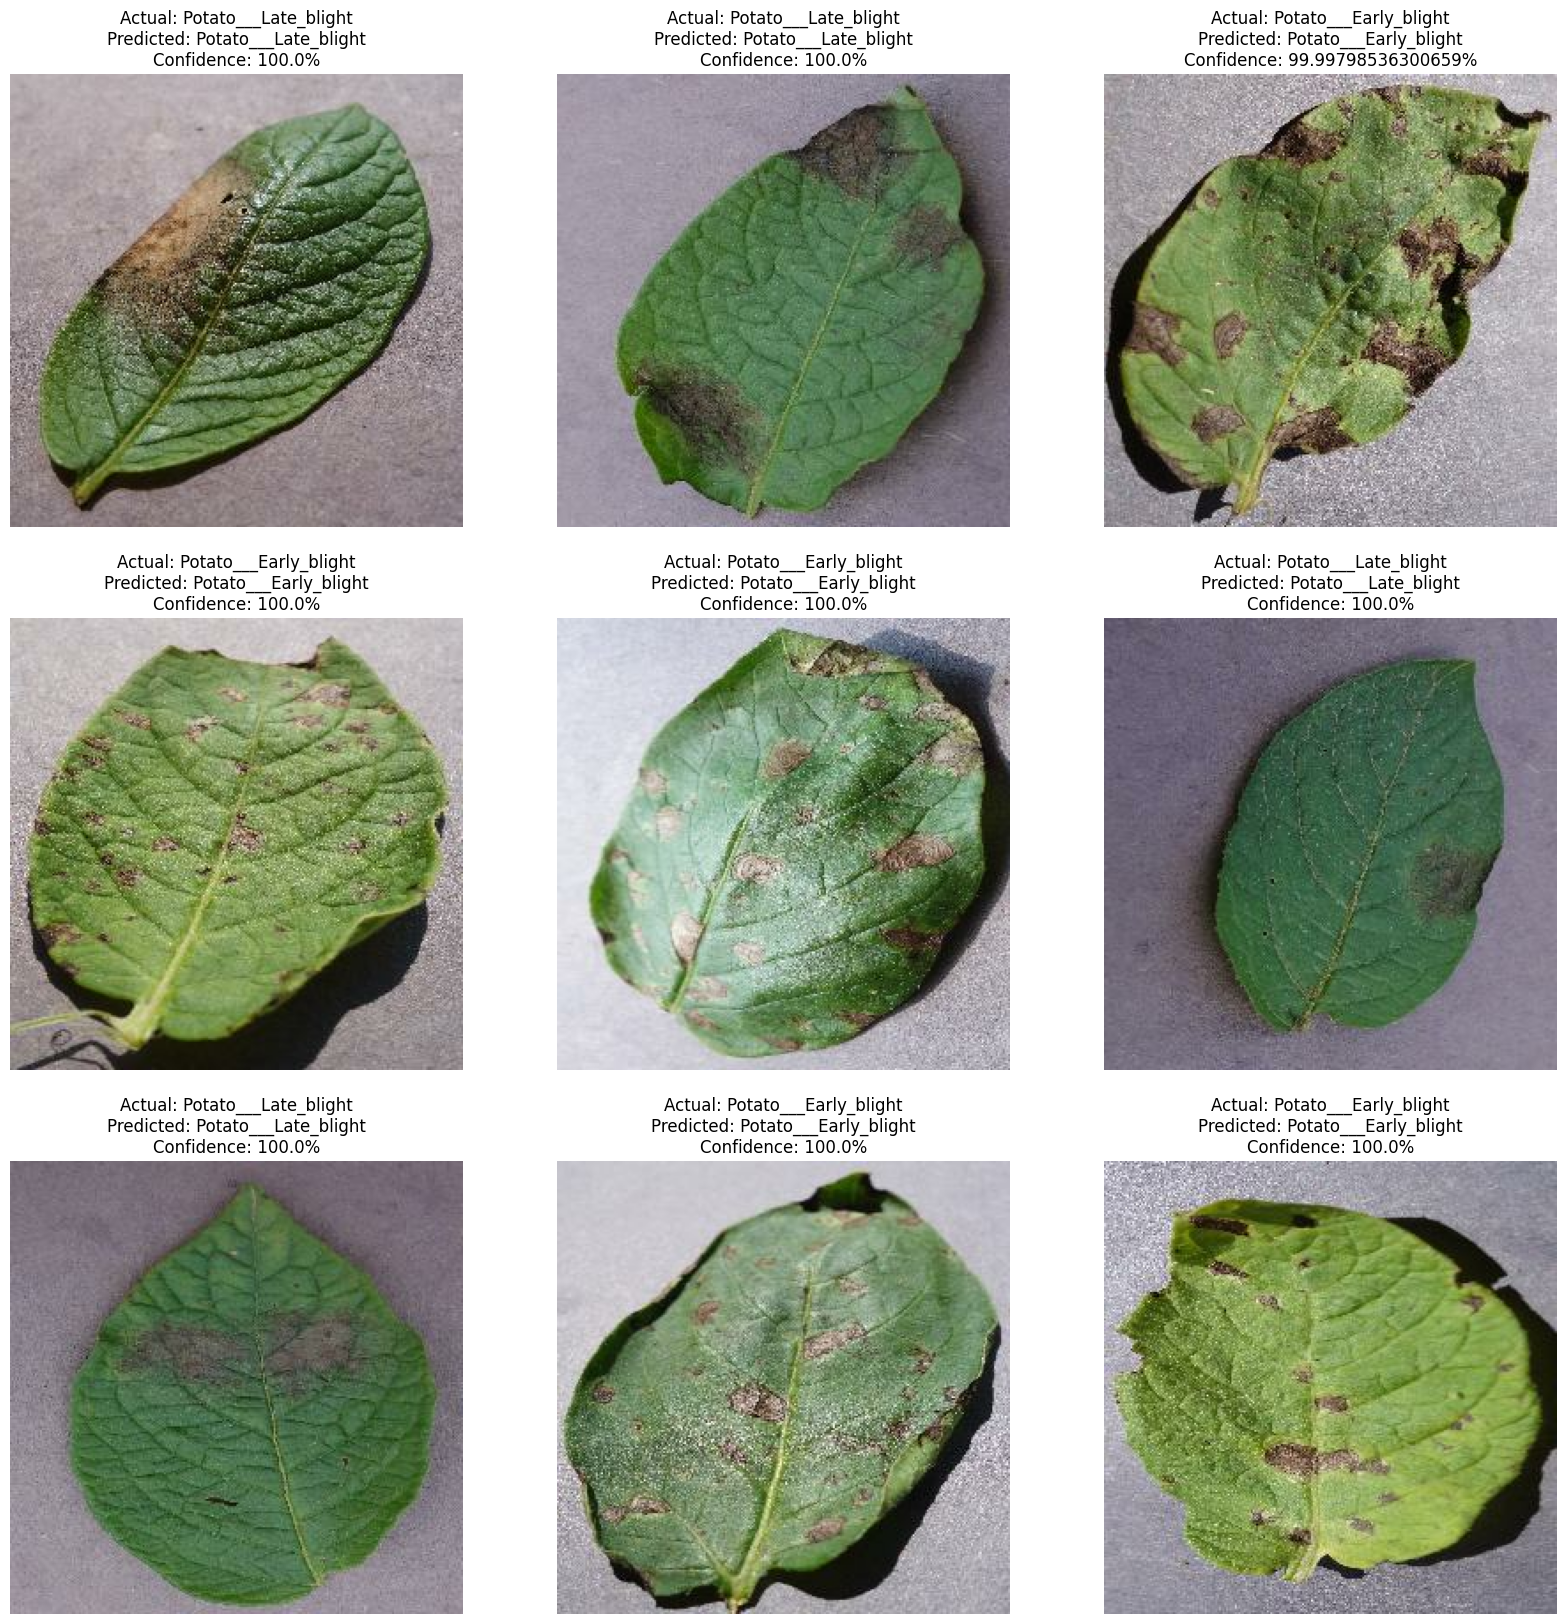

In [ ]:
plt.figure(figsize=(20, 20))
for images_batch, labels_batch in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3, 3, i + 1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images_batch[i])
        actual_class = class_names[labels_batch[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")
 

In [ ]:
model_version = "v1"  # Or any version you want
save_path = f'E:/ALUuu/model/{model_version}'  # Use forward slashes or raw string

import os
os.makedirs(save_path, exist_ok=True)

model.save(save_path)
print(f"Model saved to: {save_path}")


INFO:tensorflow:Assets written to: E:/ALUuu/model/v1\assets


INFO:tensorflow:Assets written to: E:/ALUuu/model/v1\assets


Model saved to: E:/ALUuu/model/v1


In [ ]:
import os

model_dir = 'E:/ALUuu/model'

existing_versions = [
    int(d.split('_')[1]) for d in os.listdir(model_dir)
    if d.startswith('model_') and d.split('_')[1].isdigit()
]

next_version = max(existing_versions) + 1 if existing_versions else 1
model_version = f'model_{next_version}'
save_path = os.path.join(model_dir, model_version)

os.makedirs(save_path, exist_ok=True)
model.save(save_path)

print(f"Model saved at: {save_path}")


INFO:tensorflow:Assets written to: E:/ALUuu/model\model_2\assets


INFO:tensorflow:Assets written to: E:/ALUuu/model\model_2\assets


Model saved at: E:/ALUuu/model\model_2


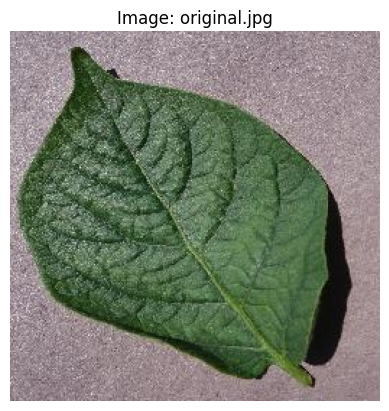

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = r'E:\ALUuu\original.jpg'  # Use raw string to avoid backslash issues
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title("Image: original.jpg")
plt.show()


1/1 [==============================] - 0s 98ms/step


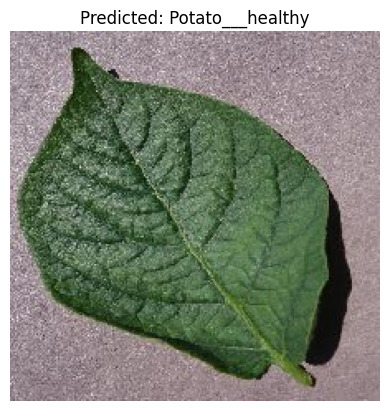

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Define the image size your model expects
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Path to the image
image_path = r'E:\ALUuu\original.jpg'

# Load and preprocess image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]

# Show image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()


In [ ]:
model.save('E:/ALUuu/my_model')



INFO:tensorflow:Assets written to: E:/ALUuu/my_model\assets


INFO:tensorflow:Assets written to: E:/ALUuu/my_model\assets


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the model from disk
model = tf.keras.models.load_model('E:/ALUuu/my_model')

# Define image path and model input size
image_path = r'E:\ALUuu\b2650214-800px-wm.jpg'
IMG_HEIGHT = 224  # Change if your model expects a different input shape
IMG_WIDTH = 224

# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]  # Make sure class_names is defined!

# Show image with predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()


ValueError: File format not supported: filepath=E:/ALUuu/my_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(E:/ALUuu/my_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).